In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

from utils import nc_utils, shape_utils

from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/

import numpy as np
import pandas as pd

In [4]:
nc_fid = Dataset('data/example.nc', 'r')

nc_attrs, nc_dims, nc_vars = nc_utils.ncdump(nc_fid,False)
times = nc_fid.variables['time'][:]
print(times)
start_date = pd.Timestamp('1980-01-01')
datetimes = start_date + pd.to_timedelta(times, unit='S')


[1622505600 1622507400]


In [7]:
latitudes = nc_fid.variables['lat'][:]
longitudes = nc_fid.variables['lon'][:]
precip = nc_fid.variables['cmorph'][:]
print(precip.shape)

(2, 1649, 4948)


In [8]:
pointsDF = pd.read_csv('points.csv')
lat_indexes = pointsDF['lat_index']
lon_indexes = pointsDF['lon_index']
filtered_lats = pointsDF['lat']
filtered_lons = pointsDF['lon']

precip_sum_pairs = np.zeros(lat_indexes.shape[0])
for i, (lat_idx, lon_idx) in enumerate(zip(lat_indexes, lon_indexes)):
    precip_sum_pairs[i] = np.sum(precip[:, lat_idx, lon_idx])

print('Sum of precipitation values for each lat/lon pair:')
print(precip_sum_pairs.shape, precip_sum_pairs)

Sum of precipitation values for each lat/lon pair:
(573,) [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

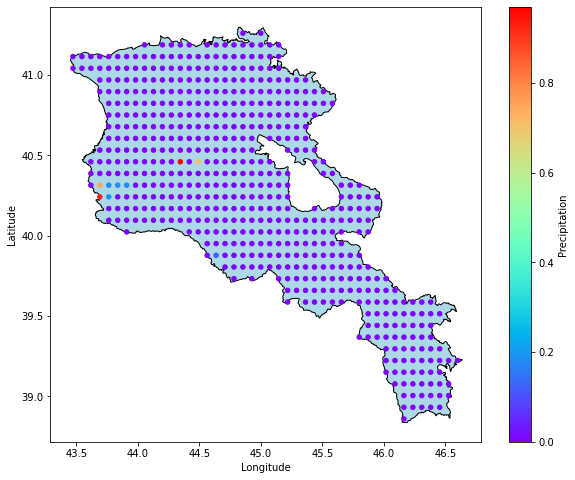

In [14]:
import geopandas as gpd

shapefile_path = '../Armenia/arm_admbnda_adm0_2019.shp'
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
gdf.plot(figsize=(10, 8),color='lightblue', edgecolor='black')

# Plot the point grid data
plt.scatter(filtered_lons, filtered_lats, c=precip_sum_pairs, cmap='rainbow', s=20)  # s is the marker size

# Add a colorbar
plt.colorbar(label='Precipitation')

# Set axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()